In [300]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression

Load and visualize training data

In [160]:
train = np.loadtxt("ex2data1.txt", delimiter=',')
X = train[:, 0:2]
m, n = X.shape
y = train[:, 2]

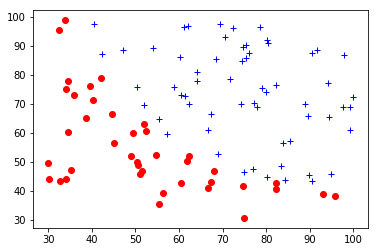

In [161]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ro')
plt.plot(X[y==1, 0], X[y==1, 1], 'b+')
# plt.plot(np.arange(100), hypothesis(theta, X))


Define Sigmoid activation function as formular, and visualize this function
$$\frac{1}{1 + e^{-z}}$$

In [162]:
def sigmoid(value):
    return 1 / (1 + math.e ** (-value))

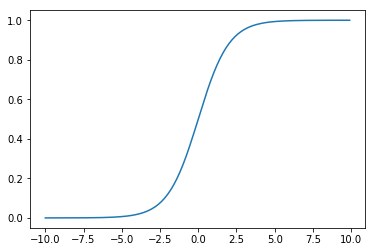

In [163]:
_x = np.arange(-10, 10, 0.1)
plt.plot(_x , sigmoid(_x))

Cost function of logistic regression formular
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m\left[-y^{(i)}log(h_\theta(x^{(i)}))  -  (1-y^{(i)})log(1 - h_\theta(x^{(i)}))\right]$$

In [282]:
def cost(theta, X, y):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return (1/m) * ( np.dot(-y.T, np.log(h)) - np.dot((1-y).T, np.log(1 - h) ))

In [283]:
def plot_decision_boundaty(theta, X):
    plt.plot(X[y==0, 0], X[y==0, 1], 'ro')
    plt.plot(X[y==1, 0], X[y==1, 1], 'b+')
    plot_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    plot_y = - ((theta[1] * plot_x) + theta[0]) / theta[2]
    plt.plot(plot_x, plot_y)

In [284]:
def plot_cost_function(J, num_iterations):
    plt.plot(np.arange(num_iterations), J)

Compute gradient of logistic regression following below fomular
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [285]:
def gradient(theta, X, y, alpha):
    return (alpha/m) * np.dot(X.T, (sigmoid(np.dot(X, theta)) - np.reshape(y, (m, 1))))

Training and visualize logistic regression model while training

In [286]:
theta = np.zeros((3, 1)) # initial theta
num_iterations = 400 
alpha = 1
J_history = np.zeros(num_iterations)

Normalize X before training to avoid numerial overflow

In [287]:
norm_X = np.copy(X)

#### Compute mean and standard deviation of features X.
When it comes to prediction phase, we normalize input features by this mean and standard deviation

In [288]:
features_mean = np.mean(X, axis=0)
features_standard_deviation = np.std(X, axis=0)

In [289]:
def features_normalized(X):
    global features_mean, features_standard_deviation
    X = (X - features_mean) / features_standard_deviation
    return X

In [290]:
# norm_X = normalize(X, axis=1, norm='l1')
# norm_X = np.column_stack([ np.ones(m) , norm_X])
norm_X = features_normalized(norm_X)
norm_X = np.insert(norm_X, 0, 1, axis=1)

In [291]:
for i in range(num_iterations):
#     visualize_logistic_regression(theta, norm_X)
    J_history[i] = cost(theta, norm_X, y)
    theta = theta - gradient(theta, norm_X, y, alpha)
    

#### Cost after running gradient descent 400 times

In [292]:
cost(theta, norm_X, y)

array([ 0.20359919])

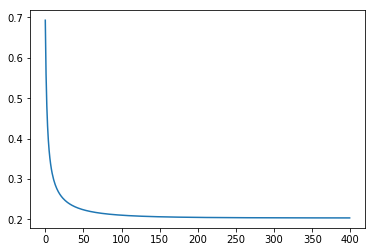

In [293]:
plot_cost_function(J_history, num_iterations)

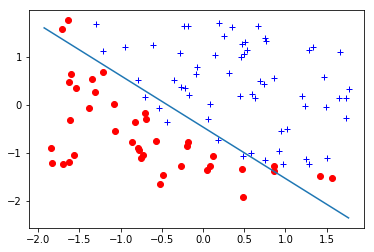

In [354]:
plot_decision_boundaty(theta, norm_X[:, 1:3])

In [295]:
def predict(theta, features):
    z = np.dot(theta.T, features)
    return sigmoid(z)

In [296]:
scores_A = np.array([45, 85])
scores_A = features_normalized(scores_A)
scores_A = np.insert(scores_A, 0, 1)
predict(theta, scores_A)

array([ 0.76776289])

In [297]:
def model_performance(theta, X):
    z = np.dot(X, theta)
    predicts = sigmoid(z)
    predicts[predicts >= 0.5] = 1
    predicts[predicts< 0.5] = 0
    return predicts

In [298]:
predicts = model_performance(theta, norm_X)
labels = np.reshape(y, (m, 1))

In [299]:
np.sum(predicts==labels)

89

#### Using scikit-learn to fit logistic regression

In [349]:
lg_classifier = LogisticRegression(max_iter=500, C=10, verbose=1)

In [350]:
lg_classifier.fit(X, y)

[LibLinear]

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [351]:
lg_classifier.score(X, y)

0.91000000000000003

### Regularized  Linear Regression and Logistic Regression

In [352]:
train_reg = np.loadtxt("ex2data2.txt", delimiter=',')

In [360]:
X_reg = train_reg[:, 0:2]
y_reg = train_reg[:, 2]
m,n = X_reg.shape

#### Visualize training set

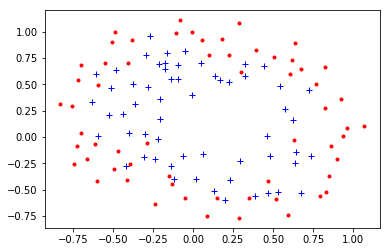

In [374]:
plt.plot(X_reg[y_reg==0, 0], X_reg[y_reg==0, 1], 'r.')
plt.plot(X_reg[y_reg==1, 0], X_reg[y_reg==1, 1], 'b+')

Base on the plot, we clearly see that this training set can not be separated by a straight line.
So the desicion boundary we have to find is gonna be non-linear.

In order to do that, we have to make up some polynomial term in our training set.
For example : if we choose 2 degree polynomial then we have to add 3 term to X, respect to $x_1^{2}$,$x_2^{2}$,$x_1x_2$

In [419]:
def mapFeature(X1, X2, degree):
    out = np.ones((X1.shape[0], 1))
    for i in np.arange(1, degree+1, 1):
        for j in range(i+1):
            out = np.append(out, X1**(i-j) * (X2**j),axis=1)
            
    return out

#### Cost function and gradient